![Astrofisica Computacional](../logo.PNG)

---
## 01. Ecuación de Advección Multidimensional

Eduard Larrañaga (ealarranaga@unal.edu.co)

---


### Resumen

Se obtiene la solución de la ecuación de advección multidimensional por el método de volumenes finitos


---

---

## Ecuación Lineal de Advección 2-Dimensional

La ecuación lineal de advección en 2-dimensiones para la función $\psi = \psi(t,x,y)$ es

\begin{equation}
\partial_t \psi + u \partial_x \psi + v \partial_y \psi = 0
\end{equation}

donde $u$ es la velocidad de advección en direccion-x y $v$ es la velocidad en dirección-y . El promedio de la función $\psi(t,x,y)$ en la zona $i,j$ se denotará como $\psi_{i,j}$ y en general, el índice $i$ etiquetará la dirección-x mientras que el índice $j$ etiqueta la dirección-y. 

<center><img src="https://i.ibb.co/gMCg1gC/2Dgrid.png" alt="2Dgrid" width="600"></center>

---

### Método de Volumenes Finitos en 2-dimensiones

Ya que $u$ y $v$ se conisderarán como constantes, es posible colocarlas dentro de las derivadas parciales en la ecuación de advección,

\begin{equation}
\partial_t \psi + \partial_x (u \psi) + \partial_y (v \psi) = 0.
\end{equation}

Se define el promedio de la función $\psi$ en una zona al integras sobre el *volumen* 2-dimensional de uno de los intervalos,

\begin{equation}
\psi_{i,j} = \frac{1}{\Delta x \Delta y} 
   \int_{x_{i-\frac{1}{2}}}^{x_{i+\frac{1}{2}}} \int_{y_{j-\frac{1}{2}}}^{y_{j+\frac{1}{2}}} 
   \psi(x,y,t) \, dx \, dy .
\end{equation}

De esta forma, al integrar la ecuación de advección con respecto a $x$ y a $y$, se obtiene

\begin{align}
\frac{1}{\Delta x \Delta y} 
  \int_{x_{i-\frac{1}{2}}}^{x_{i+\frac{1}{2}}} 
  \int_{y_{j-\frac{1}{2}}}^{y_{j+\frac{1}{2}}} \partial_t \psi \, dx \, dy =  
  &- \frac{1}{\Delta x \Delta y}
       \int_{x_{i-\frac{1}{2}}}^{x_{i+\frac{1}{2}}} \int_{y_{j-\frac{1}{2}}}^{y_{j+\frac{1}{2}}}
      \partial_x (u \psi) \, dx \, dy \nonumber \\
  &- \frac{1}{\Delta x \Delta y}
       \int_{x_{i-\frac{1}{2}}}^{x_{i+\frac{1}{2}}} \int_{y_{j-\frac{1}{2}}}^{y_{j+\frac{1}{2}}}
      \partial_y (v \psi) \, dx \, dy 
\end{align}

y al intercambiar la integral con el operador de derivada temporal al lado izquierdo e integrar adecuadamente los terminos del lado derecho se llega a

\begin{align}
 \frac{\partial \psi_{i,j}}{\partial t} =
  &- \frac{1}{\Delta x\Delta y} \int_{y_{j-\frac{1}{2}}}^{y_{j+\frac{1}{2}}}
     \left \{ (u \psi)_{i+\frac{1}{2},j} - (u \psi)_{i-\frac{1}{2},j} \right \} dy \nonumber \\
  &- \frac{1}{\Delta x\Delta y} \int_{x_{i-\frac{1}{2}}}^{x_{i+\frac{1}{2}}}
     \left \{ (v \psi)_{i,j+\frac{1}{2}} - (v \psi)_{i,j-\frac{1}{2}} \right \} dx
\end{align}

Integración de esta ecuación entre los tiempos $t^n$ y $t^{n+1}$ da como resultado

\begin{align}
 \psi_{i,j}^{n+1} - \psi_{i,j}^n = 
  &- \frac{1}{\Delta x\Delta y} \int_{t^n}^{t^{n+1}} \int_{y_{j-\frac{1}{2}}}^{y_{j+\frac{1}{2}}}
     \left \{ (u \psi)_{i+\frac{1}{2},j} - (u \psi)_{i-\frac{1}{2},j} \right \} dy dt \nonumber \\
  &- \frac{1}{\Delta x\Delta y} \int_{t^n}^{t^{n+1}} \int_{x_{i-\frac{1}{2}}}^{x_{i+\frac{1}{2}}}
     \left \{ (v \psi)_{i,j+\frac{1}{2}} - (v \psi)_{i,j-\frac{1}{2}} \right \} dx dt .
\end{align}


Ahora bien, el flujo a través de una superficie de interfaz se define como el promedio sobre la superficie de esa cara y en el tiempo. Esto da como resultado las siguientes expresiones:

1. A través de una cara de x constante:
\begin{equation}
\langle (u\psi)_{i+\frac{1}{2},j}\rangle_{(t)} = \frac{1}{\Delta y \Delta t}
    \int_{t^n}^{t^{n+1}} \int_{y_{j-\frac{1}{2}}}^{y_{j+\frac{1}{2}}} (u\psi)_{i+\frac{1}{2},j}\, dy dt
\end{equation}

2. A través de una cara de y constante:
\begin{equation}
\langle (v\psi)_{i,j+\frac{1}{2}}\rangle_{(t)} = \frac{1}{\Delta x \Delta t}
    \int_{t^n}^{t^{n+1}} \int_{x_{i-\frac{1}{2}}}^{x_{i+\frac{1}{2}}} (v\psi)_{i,j+\frac{1}{2}}\, dx dt 
\end{equation}

donde $\langle . \rangle_{(t)}$ denotará el promedio temporal sobre esa cara.

Al igual que en el caso de la advección 1-dimensional, el promedio temporal se reemplaza por el flujo en el punto medio en el tiempo y ahora, también el promedio sobre la cara se reemplazará por el valor del flujo en el centro de la cara,

\begin{equation}
\langle (u\psi)_{i+\frac{1}{2},j} \rangle_{(t)} \approx (u\psi)_{i+\frac{1}{2},j}^{n+\frac{1}{2}}
\end{equation}

y por lo tanto,

\begin{equation}
\psi_{i,j}^{n+1} = \psi_{i,j}^n - \Delta t \left [
   \frac{(u\psi)_{i+\frac{1}{2},j}^{n+\frac{1}{2}} - (u\psi)_{i-\frac{1}{2},j}^{n+\frac{1}{2}}}{\Delta x} +
   \frac{(v\psi)_{i,j+\frac{1}{2}}^{n+\frac{1}{2}} - (v\psi)_{i,j-\frac{1}{2}}^{n+\frac{1}{2}}}{\Delta y} \right ]
\end{equation} 



En este problea de advección lineal, en el que $u$ y $v$ son constantes, solo es necesario encontrar los valores de $a$ aen las interfaces, esto quiere decir $\psi^{n+1/2}_{i\pm 1/2 , j}$ en las interfaces-x y $\psi^{n+1/2}_{i, j \pm 1/2}$ en las interfaces-y. Existen dos métodos para calcular estos estados: **con división dimensional** y **sin división**. 

---
### Método de División Dimensional 

Los métodos con división dimensional son los más sencillos de implementar y tienen como base que cada una de las dimensiones se trabaja de forma independiente a las demás. Esto implica que se utilizará el método de solución 1-dimensional descrito en clases anteriores en cada una de las direcciones.

El método de Strang es un algoritmo de segundo orden de precisión en el tiempo en el cual se alterna el orden de actualización dimensional en cada paso temporal. De esta forma, cada actualización temporal en un $\Delta t$ consiste en una actualización en $x$ seguida de una actualización en $y$,

\begin{eqnarray}
\bar{\psi}_{i,j} &=& \psi_{i,j}^n 
  - \Delta t \frac{ u \psi_{i+\frac{1}{2},j}^{n+\frac{1}{2}} - u \psi_{i-\frac{1}{2},j}^{n+\frac{1}{2}} }{\Delta x}\\
\psi_{i,j}^{n+1} &=&  \bar{\psi}_{i,j}
  - \Delta t \frac{ v \bar{\psi}_{i,j+\frac{1}{2}}^{n+\frac{1}{2}} - v \bar{\psi}_{i,j-\frac{1}{2}}^{n+\frac{1}{2}} }{\Delta y}
\end{eqnarray}

Para construir los estados en las interfaces se sigue el mismo porceso descrito para la ecuación de advección 1-dimensional, i.e. considerando las expansiones desde la izquierda o desde la derecha y resolviendo el problema de Riemann correspondiente.


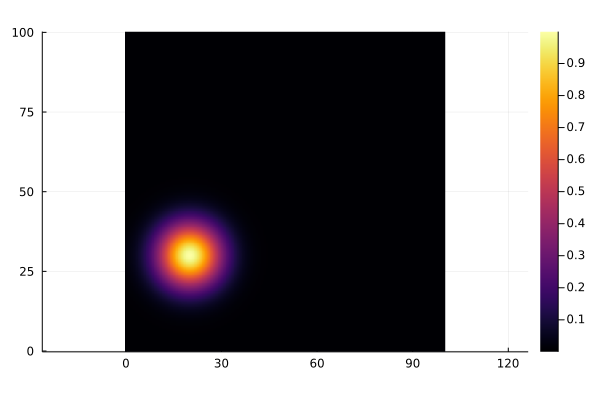

In [7]:
using Plots
using LaTeXStrings

function gaussian2D(x, y; x0=20, y0=30.)
    sigma2 = 50.
    z = zeros(length(x), length(y))
    for i in 1:length(x), j in 1:length(y)
        z[i,j] = exp(-((x[i]-x0)^2 + (y[j]-y0)^2)/(2*sigma2))
    end
    return z
end

# 2-D grid
n = 200
xrange = LinRange(0,100,n)
yrange = LinRange(0,100,n)
zrange = gaussian2D(xrange,yrange)


heatmap(xrange,yrange,transpose(zrange), aspect_ratio=:equal)

┌ Info: Saved animation to 
│   fn = /Users/eduard/Downloads/EjerciciosAC2022/06. PDEs II/MovingGaussian01.gif
└ @ Plots /Users/eduard/.julia/packages/Plots/dNEbX/src/animation.jl:114


Plots.AnimatedGif("/Users/eduard/Downloads/EjerciciosAC2022/06. PDEs II/MovingGaussian01.gif")
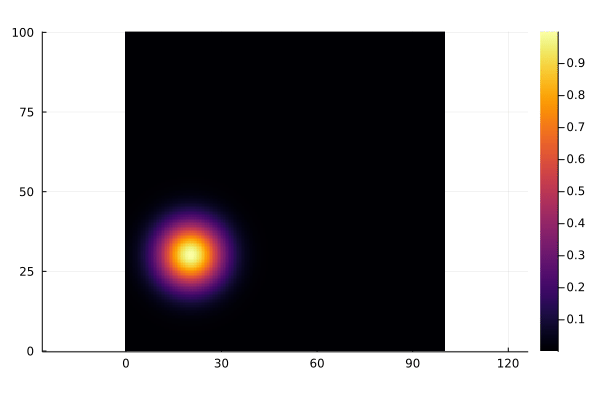

In [3]:
# Animation Example
vx = 0.2
vy = 0.1

anim = Plots.Animation()
for i in 1:5:400
    heatmap(xrange, yrange,transpose(gaussian2D(xrange,yrange; x0=20+i*vx, y0=30+i*vy)), aspect_ratio=:equal)
    Plots.frame(anim)
end
 
gif(anim, "MovingGaussian01.gif", fps = 30)

┌ Info: Saved animation to 
│   fn = /Users/eduard/Downloads/EjerciciosAC2022/06. PDEs II/Advection2D.gif
└ @ Plots /Users/eduard/.julia/packages/Plots/dNEbX/src/animation.jl:114


Plots.AnimatedGif("/Users/eduard/Downloads/EjerciciosAC2022/06. PDEs II/Advection2D.gif")
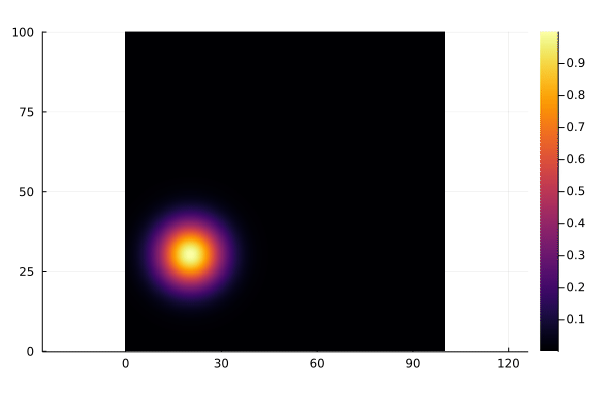

In [5]:
function derivative(f,dx)
    # First derivative dfdx in a domain range
    dfdx = zeros(length(f))
    # Lateral derivate at the boundaries
    dfdx[1] = (f[2] - f[1])/dx
    dfdx[end] = (f[end] - f[end-1])/dx
    # Central derivatives at inner points
    for i in 2:length(f)-1
        dfdx[i] = (f[i+1] - f[i-1])/(2*dx)
    end
    return dfdx
end

    
function flux(psi,v)
    v*psi
end
    

function Riemann(psi, v, dt, dx)
    # Solution of the Riemann problem
    dpsidx = derivative(psi,dx)
    psi_halftime = zeros(length(psi))
    if v>0
        for i in 1:length(psi)
            psi_halftime[i] = psi[i] + (dx/2.)*(1-(dt/dx)*v)*dpsidx[i]
        end
    else
        for i in length(psi)-1:-1:1
            psi_halftime[i] = psi[i] - (dx/2.)*(1-(dt/dx)*v)*dpsidx[i+1]
        end
    end
    return psi_halftime
end
    
    
# Finite-Volume Method
function fv(psi, v, dt, ds)
    psinew = zeros(length(psi))
    R = Riemann(psi, v, dt, ds)
    F = flux(R,v)
    for j in 2:length(psi)-1
        psinew[j] = psi[j] - (dt/ds)*(F[j] - F[j-1])
    end
    # Outflow boundary conditions
    psinew[1] = psinew[2]
    psinew[end] = psinew[end-1]
    return psinew
end   



# Initial data for the Gaussian profile
x0 = 20.
y0 = 30.

# 2-D spatial grid
Nx = 300
Ny = 300
xrange = LinRange(0,100,Nx)
yrange = LinRange(0,100,Ny)

dx = xrange[2] - xrange[1]
dy = yrange[2] - yrange[1]

# Build the Initial profile
zrange = gaussian2D(xrange, yrange; x0, y0) 


# Velocity of the advection
vx = 0.2
vy = 0.3

# CFL Coefficient
C = 0.5

# Temporal grid
t_i = 0.
t_f = 500.
dt = C*dx/abs(vx)
tgrid = t_i:dt:t_f
    


zstar = zeros(Nx,Ny)
znew = zeros(Nx,Ny)

anim = Plots.Animation()
for n in 2:length(tgrid)
    for j in 1:length(yrange)
        zstar[:,j] = fv(zrange[:,j],vx,dt,dx)
    end
    for i in 1:length(xrange)
        znew[i,:] = fv(zstar[i,:],vy,dt,dy)
    end
    zrange = znew
    heatmap(xrange, yrange, transpose(zrange), aspect_ratio=:equal)
    Plots.frame(anim)
end
 
gif(anim, "Advection2D.gif", fps = 30)
 